# Figures and tables I

This file is part of the replication code for: 

Offshore Profit Shifting and Aggregate Measurement: Balance of Payments, Foreign Investment, Productivity, and the Labor Share by Guvenen, Mataloni Jr., Rassier, and Ruhl. 

This version: February 21, 2022

This file creates all of the figures in the paper except for figures C4-C6 in the appendix. Those are created in `2-analysis-II.ipynb`.

This file also creates tables 5 and 6.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sea
from matplotlib.lines import Line2D
import numpy as np

# I take so long to write papers, MPL changed their default style.
plt.style.use('classic')
mpl.rc('lines', linewidth=2.5)

In [2]:
def get_kim_fig():
    fig, ax = plt.subplots()
    sea.despine()
    
    ax.tick_params(axis='both', labelsize=14)
    
    ax.grid(linestyle=':')
    
    # mpl will try to set an offset if you are using large nunbers
    ax.get_xaxis().get_major_formatter().set_useOffset(False)
    
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    return fig, ax

import pandas as pd

def add_after(text, beginswith, toinsert):
    '''Adds a row to a latex table. 
    Inserts the string `toinsert` into the table string `text` 
    after the row that begins with `beginswith`.'''
    ss = text.splitlines()
    
    ii = '0'
    for i, l in enumerate(ss):
        if l.startswith(beginswith) == True:
            ii = i
            break
    
    # This will throw an error if beginswith is not found.
    ss.insert(ii+1, toinsert)
    return '\n'.join(ss)

### Load the aggregate data

This file contains publicly available data from BEA. The dataset is constructed in file `1-process-public-aggregate.ipynb`.

In [3]:
public = pd.read_csv('../3-intermediate-files/aggregate.csv', index_col=0)
public.head(1)

,gnpn,gdpn,gvabusn,gvabusr,gdin,cfcn,corpincn,compn,dom_profitn,gva_deflator,...,poil,fdiusstks,usdiastks,usdiainc_havens,usdiainc_nhavens,usdia_havens,usdia_nhavens,total_mne_va,total_mne_dom_va,hrs
year,,,,,,,,,,,,,,,,,,,,,
1982,3380.299,3343.789,2568.636,4649.957,3334.953,272.52,1745.861,1275.114,197.27,0.5524,...,33.635833,124.677,207.752,8.046,16.782,43.917,163.835,NaN,NaN,73.952


### Load the adjustments

This file is created created from the condfidential data at BEA. 

In [4]:
adj_agg = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputAdjNet.xlsx', index_col='Year')
adj_agg = adj_agg.reindex(range(1982,2017))
adj_agg = adj_agg.interpolate()
adj_agg['adjearn3s_cca'] = adj_agg['adjwt3s']*public['income_adj_factor']
adj_agg['adjearncomps_cca'] = adj_agg['adjcomps']*public['income_adj_factor']
adj_agg['adjearnppes_cca'] = adj_agg['adjppes']*public['income_adj_factor']
adj_agg['adjearnrdstks_cca'] = adj_agg['adjrdstks']*public['income_adj_factor']
adj_agg.head(1)

,adjcomps,adjsales,adjrdstks,adjppes,adjwt3s,adjearn3s_cca,adjearncomps_cca,adjearnppes_cca,adjearnrdstks_cca
Year,,,,,,,,,
1982,-10.495753,-7.943045,-16.169003,-9.013675,-12.607145,-14.180719,-11.805792,-10.138727,-18.187154


### Load adjustments by industry

This file is created created from the condfidential data at BEA. 

In [5]:
adj_ind = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputAdjNetIndustry.xlsx')
adj_ind = adj_ind.set_index(['Year', 'IEDindPar'])
adj_ind = adj_ind.unstack()
adj_ind = adj_ind.reindex(range(1982,2017)).interpolate()
adj_ind.head(1)

adjcomps                                                    \
IEDindPar      1100      2100      2200      2300      3110      3130   
Year                                                                    
1982       0.015905 -0.915224 -0.141999 -0.114754  0.076571 -0.032576   

                                              ...   adjwt3s            \
IEDindPar      3150      3210      3220 3230  ...      5200      5300   
Year                                          ...                       
1982       0.027977  0.003145 -0.061976  NaN  ...  0.108821 -0.001695   

                                                                            \
IEDindPar      5411      5412 5415      5500      5600      6000      7000   
Year                                                                         
1982      -0.000843 -0.016731  NaN -0.001214 -0.019245 -0.035096 -0.019686   

                     
IEDindPar      8000  
Year                 
1982      -0.017469  

[1 rows x 200 columns]

## Load adjustments by tax haven status


This file is created created from the condfidential data at BEA. 

In [6]:
adj_tax = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputAdjNetHaven.xlsx', index_col=[0,1])
adj_tax = adj_tax.unstack()
adj_tax = adj_tax.reindex(range(1982,2017)).interpolate()
adj_tax.head(1)

adjcomps            adjsales            adjrdstks             adjppes  \
Haven         0         1         0         1          0         1         0   
Year                                                                           
1982  -4.913452 -5.582301 -3.156792 -4.786253 -11.003416 -5.165587 -3.770046   

                  adjwt3s            
Haven         1         0         1  
Year                                 
1982  -5.243629 -6.938373 -5.668772

## Figure 1A

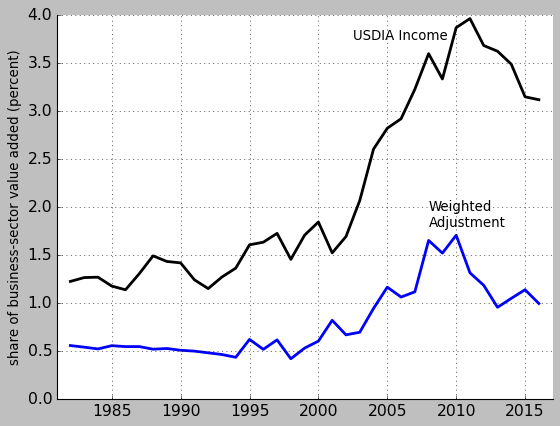

In [7]:
fig, ax = get_kim_fig()

ax.plot(public.index, 100*public['usdiaincn']/public['gvabusn'], color='black')
ax.plot(public.index, -100*adj_agg['adjearn3s_cca']/public['gvabusn'], color='blue', label='Weighted')

ax.set_xlim(1981, 2017)
ax.set_ylim(0, 4.0)

ax.text(2002.5, 3.75, 'USDIA Income')
ax.text(2008, 1.8, 'Weighted\nAdjustment')
ax.set_ylabel('share of business-sector value added (percent)')

fig.savefig('../4-figures/agg_adj_share.pdf', bbox_inches='tight')

## Figure 1B

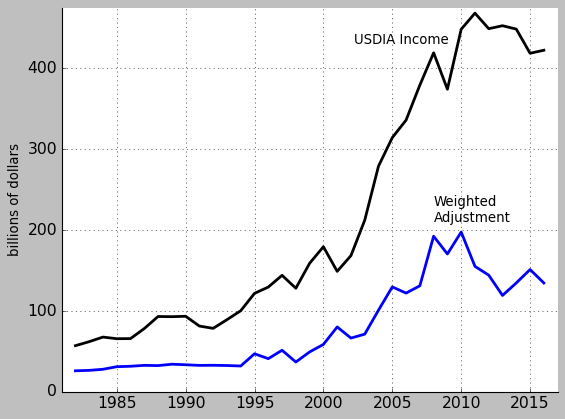

In [8]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['usdiaincn']/public['gva_deflator'], color='black')
ax.plot(public.index, -1*adj_agg['adjearn3s_cca']/public['gva_deflator'], color='blue', label='Weighted')

ax.set_xlim(1981, 2017)
ax.set_ylim(0, 475)

ax.text(2002.2, 430, 'USDIA Income')
ax.text(2008, 210, 'Weighted\nAdjustment')
ax.set_ylabel('billions of dollars')

fig.savefig('../4-figures/agg_adj_l.pdf', bbox_inches='tight')

## Figure 2A

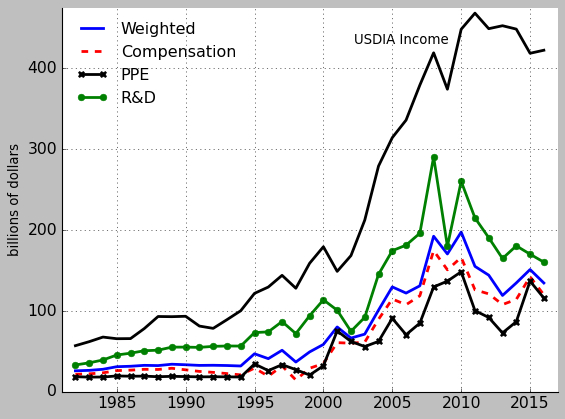

In [9]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['usdiaincn']/public['gva_deflator'], color='black')

ax.plot(public.index, -1*adj_agg['adjearn3s_cca']/public['gva_deflator'], 
        color='blue', label='Weighted')
ax.plot(public.index, -1*adj_agg['adjearncomps_cca']/public['gva_deflator'], 
        color='red', linestyle = '--', label='Compensation')
ax.plot(public.index, -1*adj_agg['adjearnppes_cca']/public['gva_deflator'], 
        color='black', marker = 'X', label='PPE')
ax.plot(public.index, -1*adj_agg['adjearnrdstks_cca']/public['gva_deflator'], 
        color='green', marker = 'o', markeredgecolor = 'green', label='R&D')

ax.set_xlim(1981, 2017)
ax.set_ylim(0, 475)

ax.text(2002.2, 430, 'USDIA Income')
ax.set_ylabel('billions of dollars')
ax.legend(frameon=False, loc='upper left')

fig.savefig('../4-figures/agg_adj_weights.pdf', bbox_inches='tight')

## Figure 2B


In [10]:
boot = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputAggStdError.xlsx', index_col=[0,1]).unstack()
boot.columns = boot.columns.droplevel()
boot = boot.reindex(range(1982,2017))
boot = boot.interpolate()

# Deflate
for c in boot.columns:
    boot[c] = boot[c]/public['gva_deflator']*-1
    
# Define some quantile functions for the groupby application.
def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

# This computes statistics across panels for each year.
boot = boot.reset_index()
boot = boot.melt(id_vars='Year')

boot = boot[['Year', 'value']].groupby('Year').agg([np.mean, np.std, q25, q75]).droplevel(0, axis=1)

boot.head(1)

,mean,std,q25,q75
Year,,,,
1982,25.560344,3.046331,23.804079,27.71305


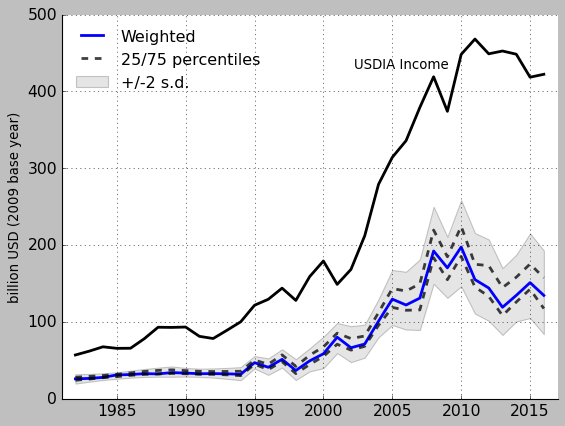

In [11]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['usdiaincn']/public['gva_deflator'], color='black')

ax.fill_between(boot.index, boot['mean']+boot['std']*2, boot['mean']-boot['std']*2, 
                facecolor='grey', alpha = 0.2, label='+/-2 s.d.')

ax.plot(public.index, -1*adj_agg['adjearn3s_cca']/public['gva_deflator'], 
        color='blue', label='Weighted')

ax.plot(boot.index, boot.q25, color='black', linestyle = '--', alpha = 0.75, label = '25/75 percentiles')
ax.plot(boot.index, boot.q75, color='black', linestyle = '--', alpha = 0.75)

ax.legend(loc='upper left', frameon=False)

ax.text(2002.2, 430, 'USDIA Income')
ax.set_ylabel('billion USD (2009 base year)')
ax.set_xlim(1981, 2017)

plt.show()
fig.savefig('../4-figures/robust.pdf', bbox_inches='tight')

## Figure 3A

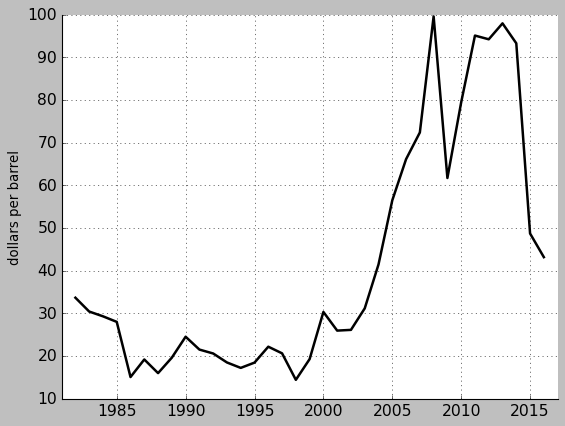

In [12]:
fig, ax  = get_kim_fig()
ax.plot(public.index, public['poil'], color='black', linewidth=2.25)
ax.set_ylabel('dollars per barrel')
ax.set_xlim(1981,2017)
fig.savefig('../4-figures/oil_prices.pdf', bbox_inches='tight')

## Figure 3B

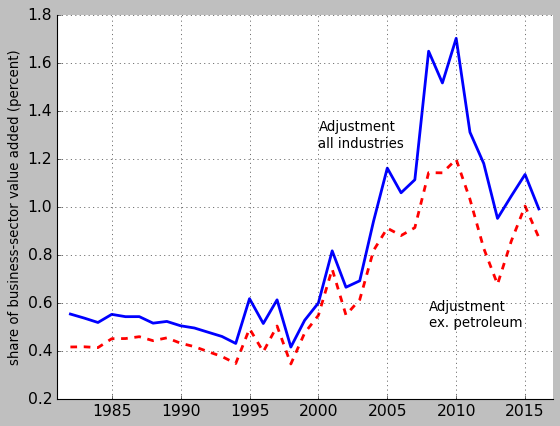

In [13]:
fig, ax  = get_kim_fig()
ax.plot(public.index, -100*adj_agg['adjearn3s_cca']/public['gvabusn'], color='blue')
ax.plot(public.index, 
        ((adj_agg['adjearn3s_cca']*(-1)) - ((adj_ind[('adjwt3s', 3240)]*(-1))*public['income_adj_factor']))/(public['gvabusn'])*100,
       color='red', linestyle='--')

ax.text(2000, 1.25, 'Adjustment\nall industries')
ax.text(2008, 0.5, 'Adjustment\nex. petroleum')


ax.set_xlim(1981, 2017)
ax.set_ylabel('share of business-sector value added (percent)')

fig.savefig('../4-figures/adjustments_nopetro.pdf', bbox_inches='tight')

## Figure 5A

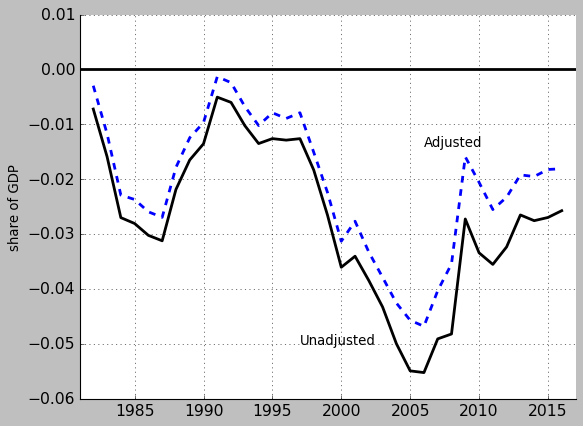

In [14]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['tradebal']/public['gdpn'], color='black')
ax.plot(public.index, (public['tradebal']-adj_agg['adjearn3s_cca'])/(public['gdpn']-adj_agg['adjearn3s_cca']), 
        color='blue', ls='--')

ax.hlines(0, 1981, 2017, color='black')

ax.set_ylim(-0.06, 0.01)
ax.set_xlim(1981, 2017)
ax.text(1997, -0.05, 'Unadjusted')
ax.text(2006, -0.014, 'Adjusted')
ax.set_ylabel('share of GDP')

fig.savefig('../4-figures/trade_balance.pdf', bbox_inches='tight')

## Figure 5(B)

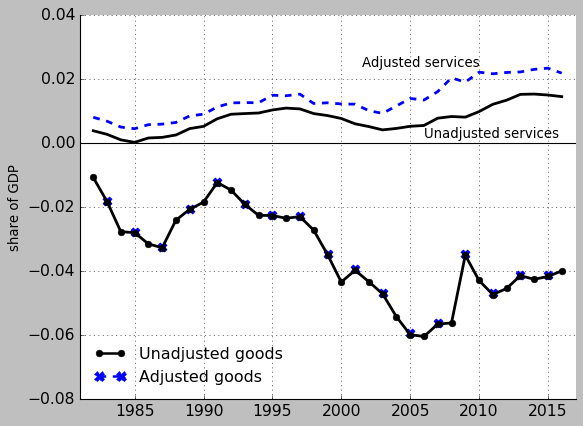

In [15]:
fig, ax = get_kim_fig()
ax.plot(public.index, public['goodbal']/public['gdpn'], color='black', marker='o')
ax.plot(public.index, public['servbal']/public['gdpn'], color='black')

ax.plot(public.index, (public['servbal']-adj_agg['adjearn3s_cca'])/(public['gdpn']-adj_agg['adjearn3s_cca']),
        color='blue', ls='--' )

public['adj_goodbal'] = (public['goodbal']-0)/(public['gdpn']-adj_agg['adjearn3s_cca'])
ax.scatter(public.iloc[1::2].index, public.iloc[1::2]['adj_goodbal'], color='blue', marker = 'X', s=60 )


ax.hlines(0, 1981, 2017, color='black', lw=1.0)

ax.set_xlim(1981, 2017)
ax.text(2001.5, 0.024, 'Adjusted services')
ax.text(2006, 0.0017, 'Unadjusted services')

legend_els = [Line2D([0], [0], color='black', lw=2.25, marker='o', label = 'Unadjusted goods'),
             Line2D([0], [0], color='blue', lw=2.25, marker='X', markersize=9, label = 'Adjusted goods', 
             markeredgecolor='blue', linestyle='--')]

ax.legend(handles=legend_els, frameon=False, loc='lower left')

ax.set_ylabel('share of GDP')
fig.savefig('../4-figures/balances.pdf', bbox_inches='tight')

### Figure 6A

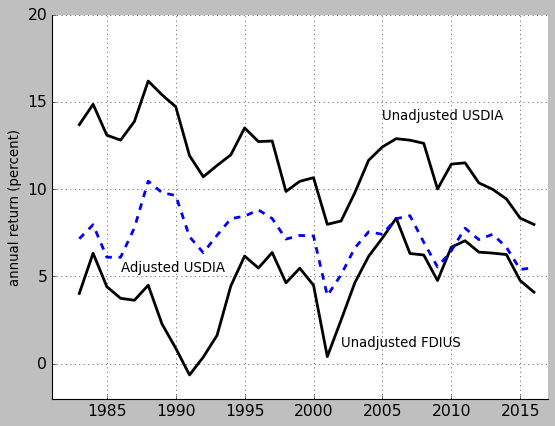

In [16]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['fdiusinc']/(0.5*public['fdiusstks'] + 0.5*public['fdiusstks'].shift(+1))*100, color='black')
ax.plot(public.index, public['usdiainc']/(0.5*public['usdiastks'] + 0.5*public['usdiastks'].shift(+1))*100, color='black')
ax.plot(public.index, (public['usdiainc']+adj_agg['adjwt3s'])/(0.5*public['usdiastks'] + 0.5*public['usdiastks'].shift(+1))*100
        , color='blue', ls='--')

ax.set_xlim(1981, 2017)
ax.set_ylim(-2, 20)

ax.text(2002, 1, 'Unadjusted FDIUS')
ax.text(1986, 5.3, 'Adjusted USDIA')
ax.text(2005, 14, 'Unadjusted USDIA')

ax.set_ylabel('annual return (percent)')

fig.savefig('../4-figures/total_returns.pdf', bbox_inches='tight')

## Figure 6B

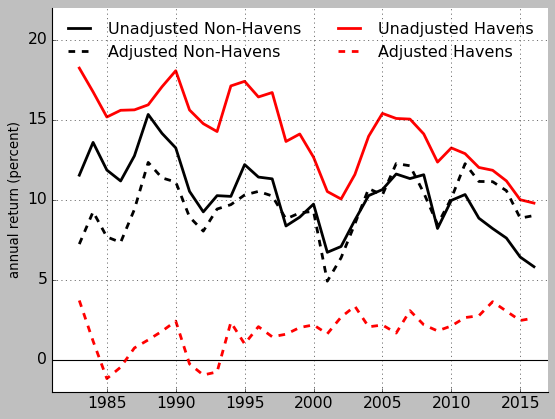

In [17]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['usdiainc_nhavens']/(0.5*public['usdia_nhavens']+0.5*public['usdia_nhavens'].shift(+1))*100, 
        color='black', linestyle='-', label='Unadjusted Non-Havens')
ax.plot(public.index, (public['usdiainc_nhavens']+adj_tax[('adjwt3s', 0)])/(0.5*public['usdia_nhavens']+0.5*public['usdia_nhavens'].shift(+1))*100, 
        color='black', linestyle='--', label='Adjusted Non-Havens')
ax.plot(public.index, public['usdiainc_havens']/(0.5*public['usdia_havens']+0.5*public['usdia_havens'].shift(+1))*100, 
        color='red', linestyle='-', label='Unadjusted Havens')
ax.plot(public.index, (public['usdiainc_havens']+adj_tax[('adjwt3s', 1)])/(0.5*public['usdia_havens']+0.5*public['usdia_havens'].shift(+1))*100, 
         color='red', linestyle='--', label='Adjusted Havens')

ax.set_xlim(1981, 2017)
ax.set_ylim(-2, 22)
ax.set_ylabel('annual return (percent)')
ax.hlines(0, 1981, 2017, color='black', lw=1.0)
ax.legend(frameon=False, ncol=2)

fig.savefig('../4-figures/returns_havens_nhavens.pdf', bbox_inches='tight')

## Figure 7A

In [18]:
public['gdibusn'] = public['gdin'] - (public['gdpn']-public['gvabusn'])
public['gdibusr'] = public['gdibusn'] / public['gva_deflator']

prod=pd.DataFrame()
prod['uprod_log'] = np.log((public['gvabusr']*public['gdibusr'] )**(1/2)/public['hrs'])
prod['uprod_gr'] = prod['uprod_log'].diff()*100
prod['uprod_cum'] = (prod['uprod_log'] - prod.loc[1982,'uprod_log'])*100

prod['gvabusr_adj'] = (public['gvabusn']-adj_agg['adjearn3s_cca'])/public['gva_deflator']
prod['gdibusr_adj'] = (public['gdibusn']-adj_agg['adjearn3s_cca'])/public['gva_deflator']
prod['aprod_log'] = np.log((prod['gvabusr_adj']*prod['gdibusr_adj'] )**(1/2)/public['hrs'])
prod['aprod_gr'] = prod['aprod_log'].diff()*100
prod['aprod_cum'] = (prod['aprod_log'] - prod.loc[1982,'aprod_log'])*100

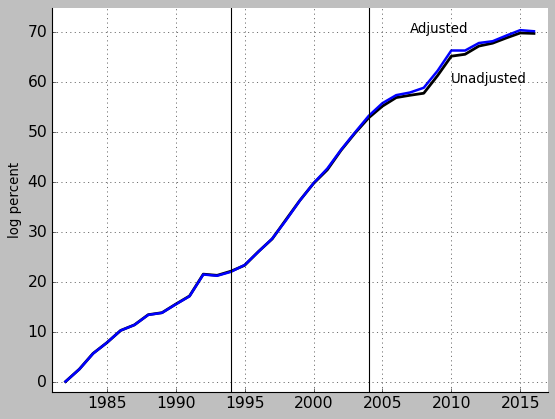

In [19]:
fig, ax = get_kim_fig()

ax.plot(prod.index, prod['uprod_cum'],color='black', label='Unadjusted')
ax.plot(prod.index, prod['aprod_cum'],color='blue',label='Adjusted', linewidth=2.25)

ax.set_ylabel('log percent')
ax.set_xlim(1981, 2017)
ax.set_ylim(-2, 75)

ax.text(2010, 60, 'Unadjusted')
ax.text(2007, 70, 'Adjusted')

ax.axvline(x=1994, color='black', lw=1.0)
ax.axvline(x=2004, color='black', lw=1.0)

fig.savefig('../4-figures/prod_all.pdf', bbox_inches='tight')

## Figure 7B

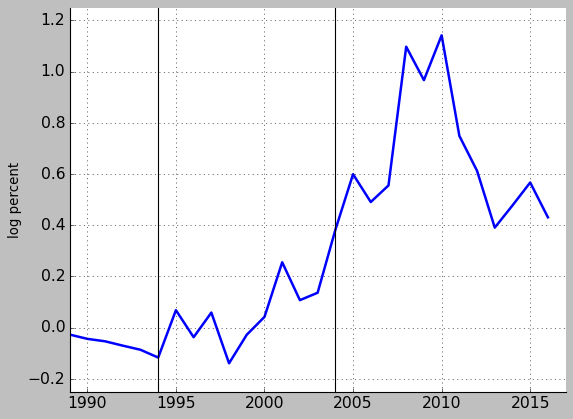

In [20]:
fig, ax = get_kim_fig()

ax.plot(prod.index, prod['aprod_cum']-prod['uprod_cum'],color='blue',label='Adjusted', linewidth=2.25)

ax.set_ylabel('log percent')
ax.set_xlim(1989, 2017)
ax.set_ylim(-0.25, 1.25)


ax.axvline(x=1994, color='black', lw=1.0)
ax.axvline(x=2004, color='black', lw=1.0)

fig.savefig('../4-figures/prod_diff.pdf', bbox_inches='tight')

## Figure C3(A)

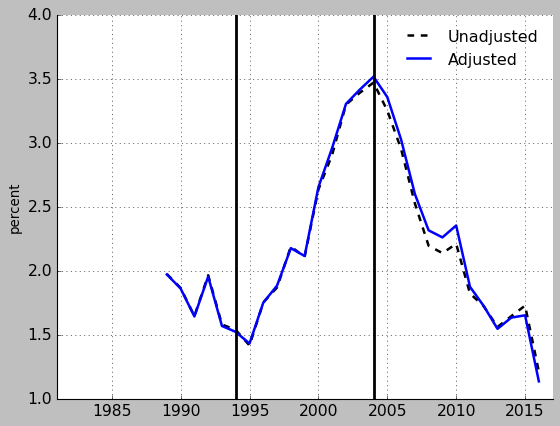

In [21]:
fig, ax = get_kim_fig()


ax.plot(prod.index, prod['uprod_gr'].rolling(7).mean(), 
        color = 'black', linewidth = 2.25, label='Unadjusted', linestyle='--')
ax.plot(prod.index, prod['aprod_gr'].rolling(7).mean(), color = 'blue', linewidth = 2.25, label='Adjusted')

ax.axvline(1994, color='black')
ax.axvline(2004, color='black')


# ax.text(2009.5, 2.45, 'Adjusted', backgroundcolor='white')
# ax.text(2003.5, 2.0, 'Unadjusted', backgroundcolor='white')

ax.legend(frameon=False)
ax.set_xlim(1981, 2017)

ax.set_ylabel('percent')
fig.savefig('../4-figures/agg_prod_roll.pdf', bbox_inches='tight')

## Figure C3(C)

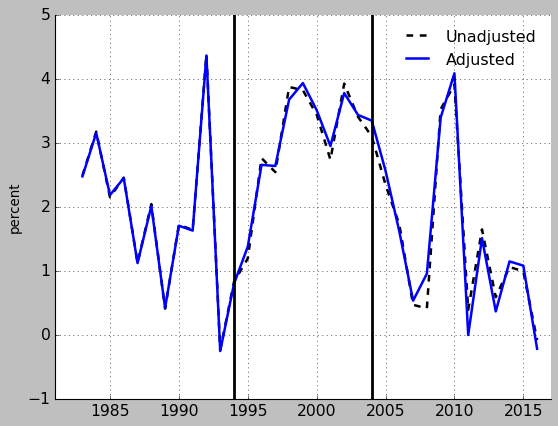

In [22]:
fig, ax = get_kim_fig()

ax.plot(prod.index, prod['uprod_gr'], color = 'black', linewidth = 2.25, linestyle='--', label='Unadjusted')
ax.plot(prod.index, prod['aprod_gr'], color = 'blue', linewidth = 2.25, label='Adjusted')

ax.axvline(1994, color='black')
ax.axvline(2004, color='black')

ax.legend(frameon=False)
ax.set_xlim(1981, 2017)

ax.set_ylabel('percent')

fig.savefig('../4-figures/agg_prod_ann.pdf', bbox_inches='tight')

## Table 5

In [23]:
intervals = [(1982, 2016), (1982,1994), (1994,2004), (2004,2016), (2004,2010),(2010,2016)]

uc, ac, ua, aa = [], [], [], [] 
for i in intervals:
    uc.append(prod.loc[i[1], 'uprod_cum'] - prod.loc[i[0], 'uprod_cum'])
    ac.append(prod.loc[i[1], 'aprod_cum'] - prod.loc[i[0], 'aprod_cum'])
    ua.append( (prod.loc[i[1], 'uprod_cum'] - prod.loc[i[0], 'uprod_cum']) / (i[1]-i[0]) )
    aa.append( (prod.loc[i[1], 'aprod_cum'] - prod.loc[i[0], 'aprod_cum']) / (i[1]-i[0]) )
    
indext = [str(i[0])+'--'+str(i[1]) for i in intervals]
    
t5 = pd.DataFrame({('Cumulative growth rate', 'Unadjusted'):uc,
              ('Cumulative growth rate', 'Adjusted'):ac,
              ('Average annual growth rate', 'Unadjusted'):ua,
              ('Average annual growth rate', 'Adjusted'):aa,}, index=indext)

In [24]:
formatters = [lambda x: '%.1f' % x, lambda x: '%.1f' % x, lambda x: '%.2f' % x, lambda x: '%.2f' % x]
s = t5.to_latex(formatters=formatters, column_format='lcccc')
print(s)

fout = open('../4-tables/table5.tex', 'w')
fout.write(s)
fout.close()

\begin{tabular}{lcccc}
\toprule
{} & \multicolumn{2}{l}{Cumulative growth rate} & \multicolumn{2}{l}{Average annual growth rate} \\
{} &             Unadjusted & Adjusted &                 Unadjusted & Adjusted \\
\midrule
1982--2016 &                   69.8 &     70.2 &                       2.05 &     2.07 \\
1982--1994 &                   22.1 &     22.0 &                       1.84 &     1.83 \\
1994--2004 &                   30.8 &     31.3 &                       3.08 &     3.13 \\
2004--2016 &                   16.9 &     17.0 &                       1.41 &     1.41 \\
2004--2010 &                   12.4 &     13.1 &                       2.06 &     2.19 \\
2010--2016 &                    4.6 &      3.9 &                       0.76 &     0.64 \\
\bottomrule
\end{tabular}



## Figure 8A

In [25]:
def read_indgroup_adjustments(indgroup):
    iadj = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputAdjNet'+indgroup+'.xlsx')
    iadj.columns = ['year', 'indgroup', 'adjcomps', 'adjsales', 'adjrdstks', 'adjppes', 'adjwt3s']
    iadj = iadj.set_index(['year', 'indgroup']).unstack()
    iadj = iadj.reindex(range(1982,2017)).interpolate()
    return iadj[('adjwt3s', 1)], iadj[('adjwt3s', 0)]

In [26]:
inds = pd.read_csv('../3-intermediate-files/industry.csv', index_col=0, header=[0,1])

for indgroup in ['RD', 'ITU', 'ITP']:
    inds[(indgroup.lower(), 'adjwt3s')], inds[('n'+indgroup.lower(), 'adjwt3s')] = read_indgroup_adjustments(indgroup)

inds.head(1)

itp                                                  \
              emp emp_gr    ngo    nva nva_gr p_gr prod_unadj_cgr   
1982  7447.431422    NaN  408.8  223.3    NaN  NaN            0.0   

                                          itu  ...             rd  \
     prod_unadj_gr unadj_rva_gr           emp  ... prod_unadj_cgr   
1982           NaN          0.0  43297.045075  ...            0.0   

                                         total        rd       nrd       itu  \
     prod_unadj_gr unadj_rva_gr            emp   adjwt3s   adjwt3s   adjwt3s   
1982           NaN          0.0  141264.017851 -5.990041 -6.617104 -3.024731   

          nitu       itp       nitp  
       adjwt3s   adjwt3s    adjwt3s  
1982 -9.582414 -2.209524 -10.397621  

[1 rows x 60 columns]

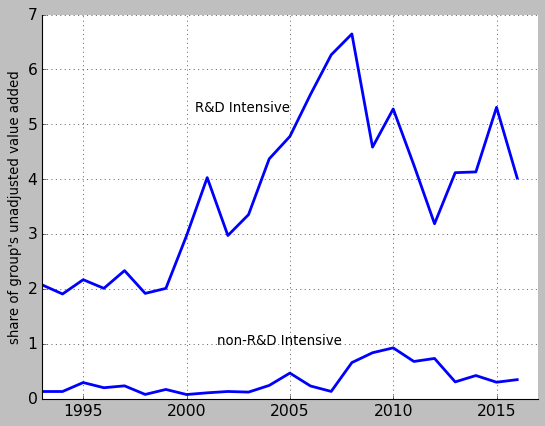

In [27]:
fig, ax = get_kim_fig()

ax.plot(inds.index, (-100)*inds[('rd', 'adjwt3s')]/inds[('rd', 'nva')], color='blue')
ax.plot(inds.index, (-100)*inds[('nrd', 'adjwt3s')]/inds[('nrd', 'nva')], color='blue')

ax.set_ylabel('share of group\'s unadjusted value added')
ax.set_xlim(1993, 2017)
ax.set_ylim(0, 7)



ax.text(2005, 5.25, 'R&D Intensive',  ha='right')
ax.text(2007.5, 1, 'non-R&D Intensive', ha='right')



fig.savefig('../4-figures/adj_rd.pdf', bbox_inches='tight')

## Figure 8B

In [28]:
def logg(x):
    return (np.log(x) - np.log(x.shift(1)))

The 'industry.csv' file only contains the data from direct public sources. In the next cell, we use that data, plus the adjustments aggregated from the confidential data, to compute adjusted measures.

In [29]:
for indgroup in ['rd', 'nrd', 'itu', 'nitu', 'itp', 'nitp']:
    inds[(indgroup, 'adj_nva_gr')] = pd.DataFrame(inds[(indgroup, 'nva')] + (-1)*inds[(indgroup, 'adjwt3s')]).apply(logg)
    inds[(indgroup, 'adj_rva_gr')] = inds[(indgroup, 'adj_nva_gr')] - inds[(indgroup, 'p_gr')]
    inds[(indgroup, 'prod_adj_gr')] = inds[(indgroup, 'adj_rva_gr')] - inds[(indgroup, 'emp_gr')]
    inds[(indgroup, 'prod_adj_cgr')] = inds[(indgroup, 'prod_adj_gr')].cumsum()
    inds[(indgroup, 'prod_adj_cgr_dif')] = (inds[(indgroup, 'prod_adj_cgr')]-inds[(indgroup, 'prod_unadj_cgr')])
    inds.loc[1982,(indgroup, 'prod_adj_cgr')] = 0 

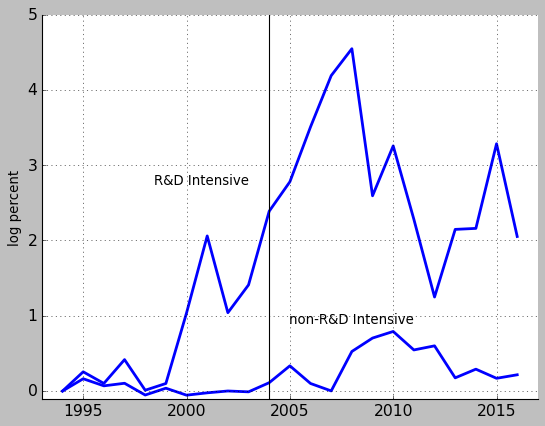

In [30]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:2016].index, 
        100*inds.loc[1994:2016, ('rd', 'prod_adj_cgr_dif')]-100*inds.loc[1994, ('rd', 'prod_adj_cgr_dif')],
        color='blue')

ax.plot(inds.loc[1994:2016].index, 
        100*inds.loc[1994:2016,('nrd', 'prod_adj_cgr_dif')]-100*inds.loc[1994,('nrd', 'prod_adj_cgr_dif')],
        color='blue')

ax.set_ylabel('log percent')
ax.set_xlim(1993, 2017)
ax.set_ylim(-0.1, 5)

ax.axvline(x=2004, color='black', lw=1.0)
ax.text(2003, 2.75, 'R&D Intensive',  ha='right')
ax.text(2011, 0.9, 'non-R&D Intensive',  ha='right')


fig.savefig('../4-figures/prod_rd_diff.pdf', bbox_inches='tight')

## Figure 9

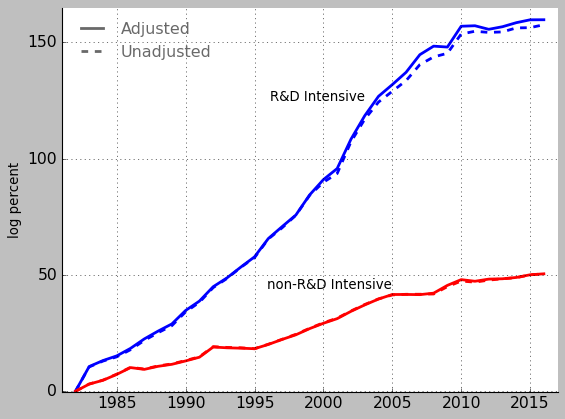

In [31]:
fig, ax = get_kim_fig()

ax.plot(inds.index, 100*inds[('rd', 'prod_adj_cgr')],color='blue')
ax.plot(inds.index, 100*inds[('rd', 'prod_unadj_cgr')],color='blue', linestyle='--')

ax.plot(inds.index, 100*inds[('nrd', 'prod_adj_cgr')],color='red')
ax.plot(inds.index, 100*inds[('nrd', 'prod_unadj_cgr')],color='red', linestyle='--')


ax.set_ylabel('log percent')
ax.set_xlim(1981, 2017)
ax.set_ylim(-0.1, 165)


ax.text(2003, 125, 'R&D Intensive',  ha='right')
ax.text(2005, 44, 'non-R&D Intensive',  ha='right')

legend_elements = [Line2D([0], [0], color='dimgray', label='Adjusted'), 
                   Line2D([0], [0], color='dimgray', linestyle='--', label='Unadjusted')]

ax.legend(handles = legend_elements, frameon=False, loc='upper left', labelcolor='dimgray')

fig.savefig('../4-figures/prod_rd_long.pdf', bbox_inches='tight')

## Figure C2(A)

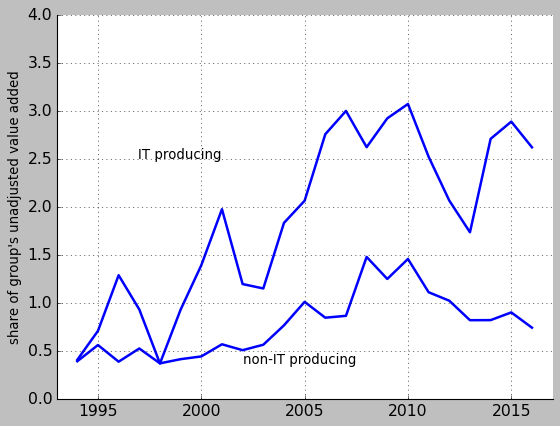

In [32]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:].index, 
        (-100)*inds.loc[1994:,('itp', 'adjwt3s')]/inds.loc[1994:,('itp','nva')],
        color='blue', linewidth=2.25)

ax.plot(inds.loc[1994:].index, 
        (-100)*inds.loc[1994:,('nitp', 'adjwt3s')]/inds.loc[1994:,('nitp','nva')],
        color='blue', linewidth=2.25)

ax.set_ylabel('share of group\'s unadjusted value added')
ax.set_xlim(1993, 2017)
ax.set_ylim(0, 4)



ax.text(2001, 2.5, 'IT producing',  ha='right')
ax.text(2007.5, 0.37, 'non-IT producing', ha='right')

fig.savefig('../4-figures/adj_itp.pdf', bbox_inches='tight')

## Figure C2(B)

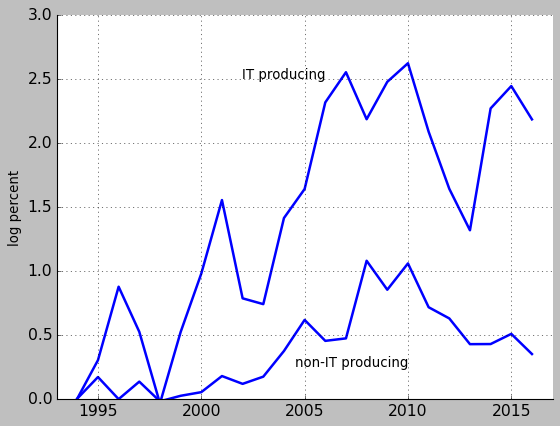

In [33]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:].index, 
        100*inds.loc[1994:, ('itp', 'prod_adj_cgr_dif')]-100*inds.loc[1994, ('itp', 'prod_adj_cgr_dif')],
        color='blue', linewidth=2.25)

ax.plot(inds.loc[1994:].index, 
        100*inds.loc[1994:2016, ('nitp', 'prod_adj_cgr_dif')]-100*inds.loc[1994, ('nitp', 'prod_adj_cgr_dif')],
        color='blue', linewidth=2.25)

ax.set_ylabel('log percent')
ax.set_xlim(1993, 2017)
ax.set_ylim(0, 3)

ax.text(2006, 2.5, 'IT producing',  ha='right')
ax.text(2010, 0.25, 'non-IT producing', ha='right')

fig.savefig('../4-figures/prod_itp.pdf', bbox_inches='tight')

## Figure C2(C)

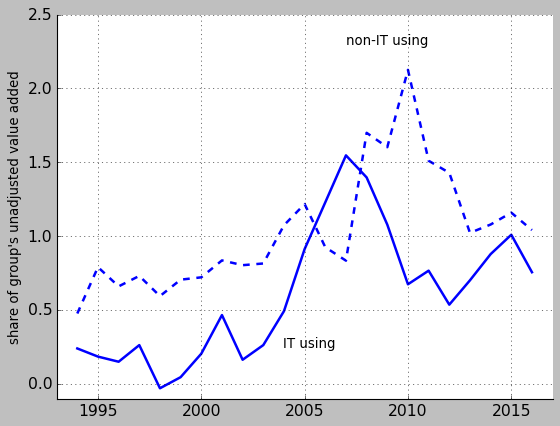

In [34]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:].index, 
        (-100)*inds.loc[1994:,('itu', 'adjwt3s')]/inds.loc[1994:,('itu','nva')],
        color='blue', linewidth=2.25)

ax.plot(inds.loc[1994:].index, 
        (-100)*inds.loc[1994:,('nitu', 'adjwt3s')]/inds.loc[1994:,('nitu','nva')],
        color='blue', linewidth=2.25, linestyle='--')

ax.set_ylabel('share of group\'s unadjusted value added')
ax.set_xlim(1993, 2017)
ax.set_ylim(-0.1, 2.5)



ax.text(2006.5, 0.25, 'IT using',  ha='right')
ax.text(2011, 2.3, 'non-IT using', ha='right')

fig.savefig('../4-figures/adj_itu.pdf', bbox_inches='tight')

## Figure C2(D)

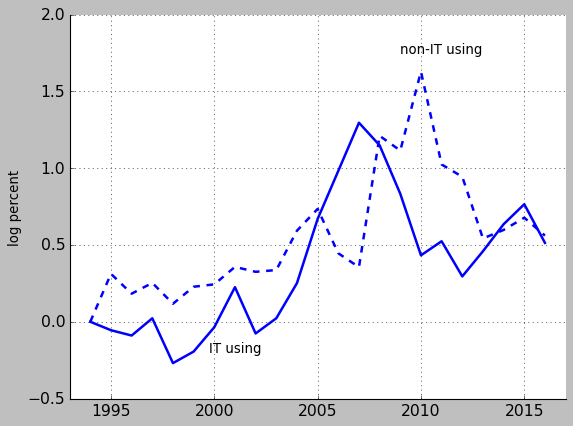

In [35]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:].index, 
        100*inds.loc[1994:, ('itu', 'prod_adj_cgr_dif')]-100*inds.loc[1994, ('itu', 'prod_adj_cgr_dif')],
        color='blue', linewidth=2.25)

ax.plot(inds.loc[1994:].index, 
        100*inds.loc[1994:, ('nitu', 'prod_adj_cgr_dif')]-100*inds.loc[1994, ('nitu', 'prod_adj_cgr_dif')],
        color='blue', linewidth=2.25, linestyle='--')

ax.set_ylabel('log percent')
ax.set_xlim(1993, 2017)
ax.set_ylim(-0.5, 2)



ax.text(1999.75, -0.2, 'IT using',  ha='left')
ax.text(2009, 1.75, 'non-IT using', ha='left')

fig.savefig('../4-figures/prod_itu.pdf', bbox_inches='tight')

## Figures C3(B)

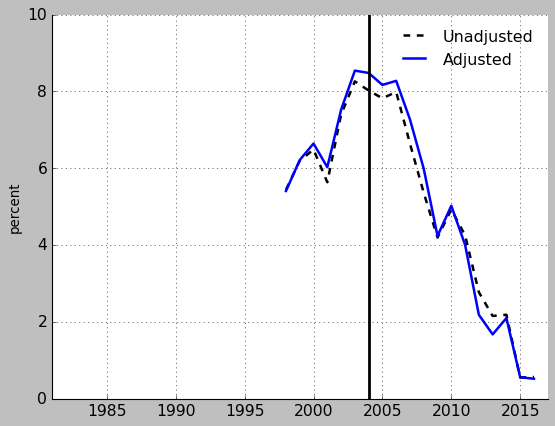

In [36]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:].index, inds.loc[1994:,('rd', 'prod_unadj_gr')].rolling(5).mean()*100, 
        color='black', linewidth=2.25, linestyle='--', label='Unadjusted')

ax.plot(inds.loc[1994:].index, inds.loc[1994:,('rd', 'prod_adj_gr')].rolling(5).mean()*100, 
        color = 'blue', linewidth=2.25, label='Adjusted')

ax.axvline(x=2004, color='black')

ax.set_ylabel('percent')

ax.set_ylim(0,10)
ax.set_xlim(1981, 2017)

ax.legend(frameon=False)
# ax.text(2006, 8.5, 'Adjusted')
# ax.text(2000, 5.1, 'Unadjusted', backgroundcolor='white')

fig.savefig('../4-figures/prod_rd_roll.pdf', bbox_inches='tight')

## Figure C3(D)

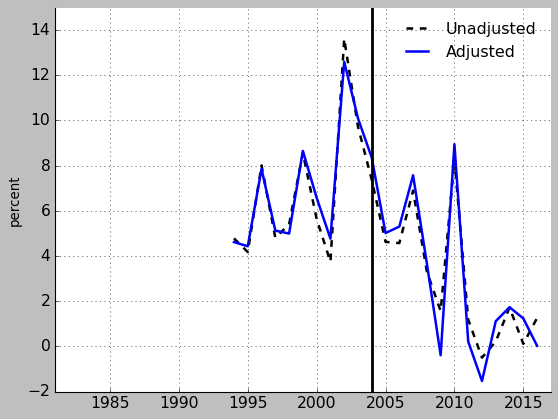

In [37]:
fig, ax = get_kim_fig()

ax.plot(inds.loc[1994:].index, inds.loc[1994:,('rd', 'prod_unadj_gr')]*100, 
        color='black', linewidth=2.25, linestyle='--', label='Unadjusted')

ax.plot(inds.loc[1994:].index, inds.loc[1994:,('rd', 'prod_adj_gr')]*100, 
        color = 'blue', linewidth=2.25, label='Adjusted')

ax.axvline(x=2004, color='black')

ax.set_ylabel('percent')
ax.set_ylim(-2,15)
ax.set_xlim(1981, 2017)

ax.legend(frameon=False)

fig.savefig('../4-figures/prod_rd_ann.pdf', bbox_inches='tight')

## Table 6

In [38]:
intervals = [(1982, 1994), (1994, 2016), (1994,2004), (2004,2016), (2004,2008), (2008,2016)]

rda, rdu, nrda, nrdu = [], [], [], [] 
for i in intervals:
    rda.append(inds.loc[i[1], ('rd','prod_adj_cgr')] - inds.loc[i[0], ('rd','prod_adj_cgr')])
    rdu.append(inds.loc[i[1], ('rd','prod_unadj_cgr')] - inds.loc[i[0], ('rd','prod_unadj_cgr')])
    nrda.append(inds.loc[i[1], ('nrd','prod_adj_cgr')] - inds.loc[i[0], ('nrd','prod_adj_cgr')])
    nrdu.append(inds.loc[i[1], ('nrd','prod_unadj_cgr')] - inds.loc[i[0], ('nrd','prod_unadj_cgr')])
    
    
    
indext = [str(i[0])+'--'+str(i[1]) for i in intervals]
    
t6 = pd.DataFrame({('RD', 'Adjusted'):rda,('RD','Unadjusted'):rdu,('NRD','Adjusted'):nrda,('NRD','Unadjusted'):nrdu}, index=indext).transpose()*100

In [39]:
cols = ['level_1'] + t6.columns.to_list()
t6 = t6.reset_index()
t6['level_1'] = '\hspace{2ex}' + t6['level_1']

s = t6.to_latex(float_format='%.1f', column_format='lSSSSS', escape=False, columns=cols, index=False)
s = add_after(s, '\midrule', 'R\&D intensive&&&&&\\\\')
s = add_after(s, '\hspace{2ex}Unadjusted', 'Non-R\&D intensive&&&&&\\\\')

print(s)
fout = open('../4-tables/table6.tex', 'w')
fout.write(s)
fout.close()

\begin{tabular}{lSSSSS}
\toprule
               level_1 &  1982--1994 &  1994--2016 &  1994--2004 &  2004--2016 &  2004--2008 &  2008--2016 \\
\midrule
R\&D intensive&&&&&\\
  \hspace{2ex}Adjusted &        53.4 &       106.4 &        73.5 &        32.9 &        21.6 &        11.3 \\
\hspace{2ex}Unadjusted &        53.3 &       104.3 &        71.1 &        33.3 &        19.4 &        13.8 \\
Non-R\&D intensive&&&&&\\
  \hspace{2ex}Adjusted &        18.6 &        32.0 &        21.1 &        10.8 &         2.5 &         8.3 \\
\hspace{2ex}Unadjusted &        18.7 &        31.8 &        21.0 &        10.7 &         2.1 &         8.6 \\
\bottomrule
\end{tabular}


## Figure 10A

Figure 10B is constructed in 2-analysis-II.ipynb

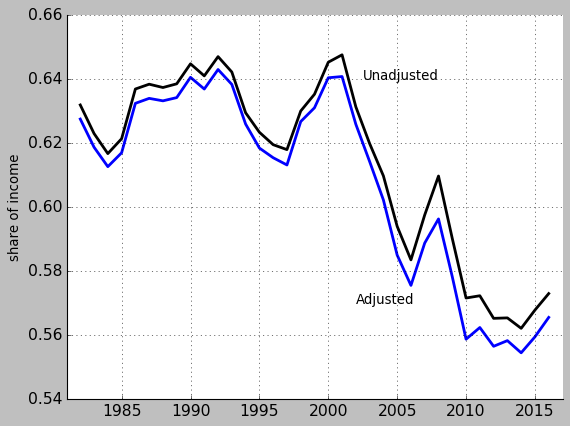

In [40]:
fig, ax = get_kim_fig()

ax.plot(public.index, public['compn']/(public['corpincn']+public['cfcn']), color='black')
ax.plot(public.index, public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca']), color='blue')

ax.set_xlim(1981, 2017)
#ax.set_ylim(0, 4.5)


ax.text(2002.5, 0.64, 'Unadjusted')
ax.text(2002, 0.57, 'Adjusted')


ax.set_ylabel('share of income')
fig.savefig('../4-figures/gross_labor_share.pdf', bbox_inches='tight')

## Figure 11A

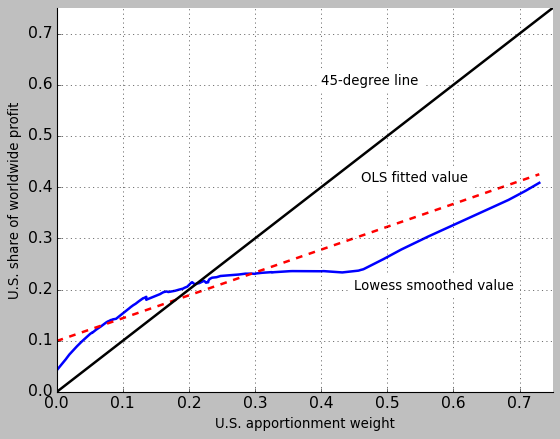

In [41]:
fdius12 = pd.read_csv('../0-confidential-data-replication-files/FDIUS/FigureForPaper2012.csv', index_col='year')
fdius12 = fdius12.sort_values('WtdShrEmpCompPPE')

fig, ax = get_kim_fig()
ax.plot(fdius12.WtdShrEmpCompPPE, fdius12.LowessFitted, color='b', linestyle='-', linewidth=2.25)
ax.plot(fdius12.WtdShrEmpCompPPE, fdius12.RegFitted, 'r--' , linewidth=2.25)


# 45 degree line
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, 'k', linewidth=2.25)
    
ax.set_xlim(0, 0.75)
ax.set_ylim(0, 0.75)
ax.set_ylabel('U.S. share of worldwide profit')
ax.set_xlabel('U.S. apportionment weight')

ax.annotate('45-degree line', xy=(0.40, 0.6), backgroundcolor='white')
ax.annotate('OLS fitted value', xy=(0.46, 0.41), backgroundcolor='white')
ax.annotate('Lowess smoothed value', xy=(0.45,0.20), backgroundcolor='white')

fig.savefig('../4-figures/fdius12.pdf', bbox_inches='tight')

plt.show()

## Figure 11B

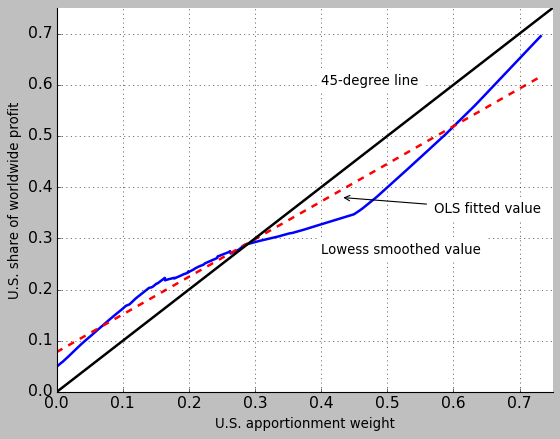

In [42]:
fdius15 = pd.read_csv('../0-confidential-data-replication-files/FDIUS/FigureForPaper2015.csv', index_col='year')
fdius15 = fdius15.sort_values('WtdShrEmpCompPPE')

fig, ax = get_kim_fig()
ax.plot(fdius15.WtdShrEmpCompPPE, fdius15.LowessFitted, color='b', linestyle='-', linewidth=2.25)
ax.plot(fdius15.WtdShrEmpCompPPE, fdius15.RegFitted, 'r--' , linewidth=2.25)


# 45 degree line
x = np.linspace(*ax.get_xlim())
ax.plot(x, x, 'k', linewidth=2.25)
    
ax.set_xlim(0, 0.75)
ax.set_ylim(0, 0.75)
ax.set_ylabel('U.S. share of worldwide profit')
ax.set_xlabel('U.S. apportionment weight')

ax.annotate('45-degree line', xy=(0.40, 0.6), backgroundcolor='white')
ax.annotate('OLS fitted value', xytext=(0.57, 0.35), xy=(0.43,0.38),arrowprops=dict(facecolor='black', arrowstyle='->'),  backgroundcolor='white')
ax.annotate('Lowess smoothed value', xy=(0.40,0.27), backgroundcolor='white')

fig.savefig('../4-figures/fdius15.pdf', bbox_inches='tight')

plt.show()

## Figure C1(A)

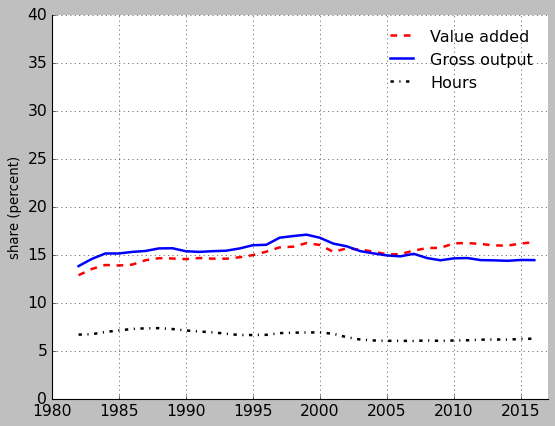

In [43]:
fig, ax = get_kim_fig()

ax.plot(inds.index, inds[('rd', 'nva')]/inds[('pi', 'nva')]*100, color='red', ls='--', linewidth=2.25, label='Value added')
ax.plot(inds.index, inds[('rd', 'ngo')]/inds[('pi', 'ngo')]*100, color='blue', linewidth=2.25, label='Gross output')
ax.plot(inds.index, inds[('rd', 'emp')]/inds[('total', 'emp')]*100, color='black', ls='-.', linewidth=2.25, label='Hours')


ax.set_ylim(0,40)
ax.set_xlim(1980, 2017)

ax.legend(frameon=False)

ax.set_ylabel('share (percent)')
fig.savefig('../4-figures/rd_shares_apx.pdf', bbox_inches='tight')

## Figure C1(B)

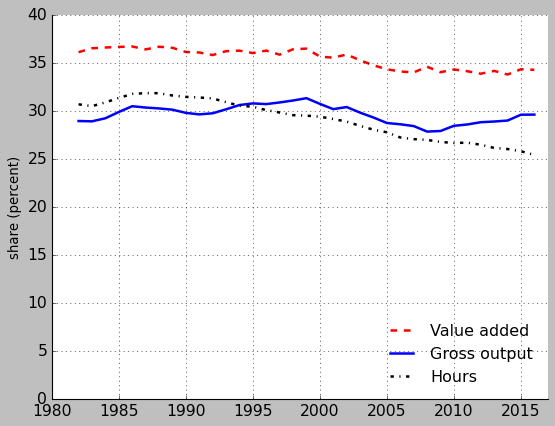

In [44]:
fig, ax = get_kim_fig()

ax.plot(inds.index, inds[('itu', 'nva')]/inds[('pi', 'nva')]*100, color='red', ls='--', linewidth=2.25, label='Value added')
ax.plot(inds.index, inds[('itu', 'ngo')]/inds[('pi', 'ngo')]*100, color='blue', linewidth=2.25, label='Gross output')
ax.plot(inds.index, inds[('itu', 'emp')]/inds[('total', 'emp')]*100, color='black', ls='-.', linewidth=2.25, label='Hours')


ax.set_ylim(0,40)
ax.set_xlim(1980, 2017)

ax.legend(frameon=False, loc='lower right')
ax.set_ylabel('share (percent)')
fig.savefig('../4-figures/itu_shares_apx.pdf', bbox_inches='tight')

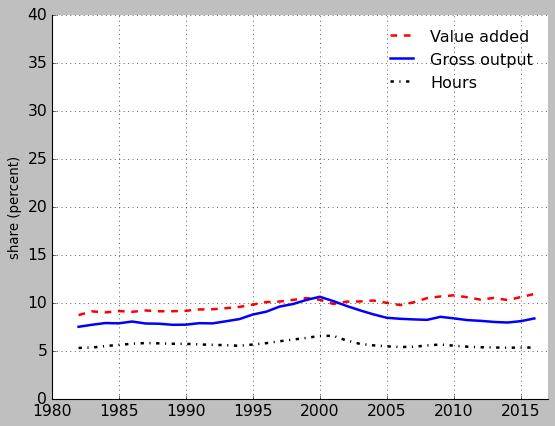

In [45]:
fig, ax = get_kim_fig()

ax.plot(inds.index, inds[('itp', 'nva')]/inds[('pi', 'nva')]*100, color='red', ls='--', linewidth=2.25, label='Value added')
ax.plot(inds.index, inds[('itp', 'ngo')]/inds[('pi', 'ngo')]*100, color='blue', linewidth=2.25, label='Gross output')
ax.plot(inds.index, inds[('itp', 'emp')]/inds[('total', 'emp')]*100, color='black', ls='-.', linewidth=2.25, label='Hours')


ax.set_ylim(0,40)
ax.set_xlim(1980, 2017)

ax.legend(frameon=False, loc='upper right')
ax.set_ylabel('share (percent)')

fig.savefig('../4-figures/itp_shares_apx.pdf', bbox_inches='tight')

## Numbers for the draft

The depreciation rate of RD is from [here](https://apps.bea.gov/national/pdf/BEA_depreciation_rates.pdf). It is the average of the 4 headings under "Research and development /24/"

In [46]:
# A few calculations to make my life easier...

adjva_share_unadjva = (prod['gvabusr_adj']-public['gvabusn']/public['gva_deflator'])/ (public['gvabusn']/public['gva_deflator'])

usdia_runadj = public['usdiainc']/(0.5*public['usdiastks'] + 0.5*public['usdiastks'].shift(+1))
usdia_radj = (public['usdiainc']+adj_agg['adjwt3s'])/(0.5*public['usdiastks'] + 0.5*public['usdiastks'].shift(+1))
fdius_runadj = public['fdiusinc']/(0.5*public['fdiusstks'] + 0.5*public['fdiusstks'].shift(+1))
usdia_nh_runadj = public['usdiainc_nhavens']/(0.5*public['usdia_nhavens']+0.5*public['usdia_nhavens'].shift(+1))
usdia_nh_radj = (public['usdiainc_nhavens']+adj_tax[('adjwt3s', 0)])/(0.5*public['usdia_nhavens']+0.5*public['usdia_nhavens'].shift(+1))
usdia_h_runadj = public['usdiainc_havens']/(0.5*public['usdia_havens']+0.5*public['usdia_havens'].shift(+1))
usdia_h_radj = (public['usdiainc_havens']+adj_tax[('adjwt3s', 1)])/(0.5*public['usdia_havens']+0.5*public['usdia_havens'].shift(+1))

ls_unadj = public['compn']/(public['corpincn']+public['cfcn'])
ls_adj = public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca'])

tb_adj = (public['tradebal']-adj_agg['adjearn3s_cca'])/(public['gdpn']-adj_agg['adjearn3s_cca'])
tb_unadj = public['tradebal']/public['gdpn']

# The depreciation numbers
rd_dep = sum([0.10,0.16,0.25,0.40,0.40,0.27])/6

# Fequency of affiliate ownership 
own_freq = pd.read_excel('../0-confidential-data-replication-files/USDIA/OutputMajWhol.xlsx', index_col='VotePercent')

# Cum difference rd, nrd, and total 1999-2008
rd_9908_cd = (inds.loc[2008, ('rd','prod_adj_cgr')] - inds.loc[1999, ('rd','prod_adj_cgr')])*100-(inds.loc[2008, ('rd','prod_unadj_cgr')] - inds.loc[1999, ('rd','prod_unadj_cgr')])*100
nrd_9908_cd = (inds.loc[2008, ('nrd','prod_adj_cgr')] - inds.loc[1999, ('nrd','prod_adj_cgr')])*100-(inds.loc[2008, ('nrd','prod_unadj_cgr')] - inds.loc[1999, ('nrd','prod_unadj_cgr')])*100
total_9908_cd = (prod.loc[2008, 'aprod_cum'] - prod.loc[1999, 'aprod_cum']) - (prod.loc[2008, 'uprod_cum'] - prod.loc[1999, 'uprod_cum'])

# Adj prod growth 
rd_8216_gr = inds.loc[2016,('rd', 'prod_adj_cgr')]-inds.loc[1982,('rd', 'prod_adj_cgr')]
nrd_8216_gr = inds.loc[2016,('nrd', 'prod_adj_cgr')]-inds.loc[1982,('nrd', 'prod_adj_cgr')]

rd_8294_gr = inds.loc[1994,('rd', 'prod_adj_cgr')]-inds.loc[1982,('rd', 'prod_adj_cgr')]
nrd_8294_gr = inds.loc[1994,('nrd', 'prod_adj_cgr')]-inds.loc[1982,('nrd', 'prod_adj_cgr')]

rd_9408_gr = inds.loc[2008,('rd', 'prod_adj_cgr')]-inds.loc[1994,('rd', 'prod_adj_cgr')]
nrd_9408_gr = inds.loc[2008,('nrd', 'prod_adj_cgr')]-inds.loc[1994,('nrd', 'prod_adj_cgr')]

rd_8210_gr = inds.loc[2010,('rd', 'prod_adj_cgr')]-inds.loc[1982,('rd', 'prod_adj_cgr')]
nrd_8210_gr = inds.loc[2010,('nrd', 'prod_adj_cgr')]-inds.loc[1982,('nrd', 'prod_adj_cgr')]

In [47]:
x = {}

# Section 0: Abstract 
x[0.00] = ['1982-2016 share of usdia income reatributable to US is', (-1*adj_agg['adjearn3s_cca']/public['usdiaincn']).mean(), '{:.0%}']

# Section 1: Introduction
x[1.00] = ['1982-2016 share of usdia income reatributable to US', ((-1)*adj_agg['adjearn3s_cca']/public['usdiaincn']).mean(), '{:.0%}']
x[1.01] = ['peak profit shifted ($bil)', (-1*adj_agg['adjearn3s_cca']/public['gva_deflator']).max(), '{:.0f}']
x[1.02] = ['average profit shifted since 2010 ($bil)', (-1*adj_agg.loc[2010:,'adjearn3s_cca']/public.loc[2010:,'gva_deflator']).mean(), '{:.0f}']

x[1.03] = ['mne global value added ($tril)', public.loc[2016, 'total_mne_va']/1000, '{:.2f}']
x[1.04] = ['parent domestic value add ($tril)', public.loc[2016, 'total_mne_dom_va']/1000, '{:.2f}']
x[1.05] = ['parent domestic va as share of us va', public.loc[2016, 'total_mne_dom_va']/public.loc[2016, 'gvabusn'], '{:.1%}']
x[1.06] = ['1982-1993 avg usdia as share of corp profit', (public['usdiaincn']/public['dom_profitn']).loc[1982:1993].mean(), '{:.1%}']
x[1.07] = ['2016 usdia as share of corp profit', (public['usdiaincn']/public['dom_profitn']).loc[2016], '{:.1%}']
x[1.08] = ['2016 usdia ', public['usdiaincn'].loc[2016], '{:.0f}']

# 1.09-11 Are computed in 2-analysis-III.ipynb

x[1.12] = ['1982-1999 max diff adj vs unadj va added', adjva_share_unadjva.loc[1982:1999].max(), '{:.1%}']
x[1.13] = ['peak diff in adj v unadj va in', adjva_share_unadjva.max(), '{:.1%}']
x[1.14] = ['2013-2016 mean diff in adj v unadj ', adjva_share_unadjva.loc[2013:2016].max(), '{:.1%}']
x[1.15] = ['max adjustment in rd industries is  of va', ((-1)*inds[('rd', 'adjwt3s')]/inds[('rd', 'nva')]).max(),'{:.1%}']
x[1.16] = ['max adjustment in nrd industries is  of va', ((-1)*inds[('nrd', 'adjwt3s')]/inds[('nrd', 'nva')]).max(),'{:.1%}']

# 1.17-1.18 Are computed in 2-analysis-III.ipynb

x[1.19] = ['2016 unadjusted trade bal', (public['tradebal']/public['gdpn']).loc[2016], '{:.1%}']
x[1.20] = ['2016 adjusted trade bal', ((public['tradebal']-adj_agg['adjearn3s_cca'])/(public['gdpn']-adj_agg['adjearn3s_cca'])).loc[2016], '{:.1%}'] 
x[1.21] = ['1982-2016 mean un adj usdia r', usdia_runadj.mean(), '{:.1%}']
x[1.22] = ['1982-2016 mean adj usdia r', usdia_radj.mean(), '{:.1%}']
x[1.23] = ['1982-2016 mean undaj fius r', fdius_runadj.mean(), '{:.1%}']
x[1.24] = ['2005-2016 mean adj usdia r', usdia_radj.loc[2005:].mean(),'{:.1%}']
x[1.25] = ['unadj r fdius', fdius_runadj.loc[2005:].mean(), '{:.1%}']
x[1.26] = ['mean usdia r havens unadj', usdia_h_runadj.mean(), '{:.1%}']
x[1.27] = ['mean usdia r havens adj', usdia_h_radj.mean(), '{:.1%}']
x[1.28] = ['mean usdia r nonhavens unadj', usdia_nh_runadj.mean(), '{:.1%}']
x[1.29] = ['mean usdia r nonhavens unadj', usdia_nh_radj.mean(), '{:.1%}']
x[1.30] = ['2004-2010 increase in prod is (bps)', 100*(t5.loc['2004--2010', ('Average annual growth rate', 'Adjusted')]-t5.loc['2004--2010', ('Average annual growth rate', 'Unadjusted')]), '{:.0f}']
x[1.31] = ['1999-08 rd cum prod adj/nrd cum prod adj ', rd_9908_cd/nrd_9908_cd, '{:.1f}']
x[1.32] = ['1999-08 rd cum prod adj/total cum prod adj',rd_9908_cd/total_9908_cd, '{:.1f}']
x[1.33] = ['1982-2016 unadj rd prod grw / unadj nrd prod grw', rd_8216_gr/nrd_8216_gr, '{:.0f}']
x[1.34] = ['1982-2016 avg ann unadj rd prod grw',rd_8216_gr/(2016-1982) ,'{:.1%}']
x[1.35] = ['1982-2016 avg ann unadj nrd prod grw',nrd_8216_gr/(2016-1982) ,'{:.1%}']
x[1.36] = ['1982-2016: adj labor share falls xx more than unadj', (ls_unadj.loc[2008]-ls_unadj.loc[1987])-(ls_adj.loc[2008]-ls_adj.loc[1987]), '{:.1%}']

# 1.37-1.38 Are computed in 2-analysis-III.ipynb

x[1.39] = ['2012 profit shifting of ($bil)', -1*adj_agg['adjearn3s_cca'].loc[2012], '{:.0f}']
x[1.40] = ['2015 profit shifting of ($bil)', -1*adj_agg['adjearn3s_cca'].loc[2015], '{:.0f}']
x[1.41] = ['2015 profit shifting of ($bil)', -1*adj_agg['adjearn3s_cca'].loc[2015], '{:.0f}']
x[1.42] = ['2015 profit shifting as share of 2010', 1- (-1*adj_agg['adjearn3s_cca']).loc[2015] / (-1*adj_agg['adjearn3s_cca']).loc[2010], '{:.0%}']

# Section 2: Measurement framework
# No numbers in text

# Section 3: Constructing the adjustment

x[3.00] = ['RD depreciation rate', rd_dep, '{:.0%}']
x[3.01] = ['2016 MOFA share of total affs', own_freq.loc[own_freq.index>0.5, 'PERCENT'].sum(), '{:.0f}']
x[3.02] = ['2016 share wholly owned affiliates', own_freq.loc[1, 'PERCENT'], '{:.0f}']



# Section 4: The Adjustment

x[4.00] = ['1982-1999 max diff adj vs unadj va added', adjva_share_unadjva.loc[1982:1999].max(), '{:.1%}']
x[4.01] = ['peak diff in adj v unadj va', adjva_share_unadjva.max(), '{:.1%}']
x[4.02] = ['2000-16 total profit shifting ($tril)', -1*adj_agg['adjearn3s_cca'].loc[2000:2016].sum()/1000, '{:.2f}']
x[4.03] = ['peak profit shifted ($bil)', (-1*adj_agg['adjearn3s_cca']).max(), '{:.0f}']
x[4.04] = ['2016 profit shifting ($bil)', -1*adj_agg['adjearn3s_cca'].loc[2016], '{:.0f}']
x[4.05] = ['2000-16 total profit shifting ($tril)', -1*adj_agg['adjearn3s_cca'].loc[2000:2016].sum()/1000, '{:.2f}']
x[4.06] = ['2000-16 total profit shifting only compensation weights ($tril)', -1*adj_agg['adjearncomps_cca'].loc[2000:2016].sum()/1000, '{:.2f}']
x[4.07] = ['2000-16 total profit shifting only ppe weights ($tril)', -1*adj_agg['adjearnppes_cca'].loc[2000:2016].sum()/1000, '{:.2f}']
x[4.08] = ['2000-16 total profit shifting only rd weights ($tril)', -1*adj_agg['adjearnrdstks_cca'].loc[2000:2016].sum()/1000, '{:.2f}']
x[4.09] = ['std of the adj in 2016 ($bil)', boot.loc[2016,'std'], '{:.1f}']
x[4.10] = ['oil price 1986-1999 avg ($)', public.loc[1986:1999,'poil'].mean(), '{:.0f}']
x[4.11] = ['oil price 2014 ($)', public.loc[2014,'poil'].mean(), '{:.0f}']
x[4.12] = ['2016 share of usdia income reatributable to US', (-1)*adj_agg.loc[2016,'adjearn3s_cca']/public.loc[2016,'usdiaincn'], '{:.0%}']

# 4.13-4.17 Are computed in 2-analysis-III.ipynb

x[4.18] = ['2015 profit shifting of ($bil)', -1*adj_agg['adjearn3s_cca'].loc[2015], '{:.1f}']

# 4.19-4.26 Are computed in 2-analysis-III.ipynb

# Section 5: 

x[5.00] = ['max diff of adj and unadj tb', (tb_adj.loc[:1999]-tb_unadj.loc[:1999]).abs().max(), '{:.1%}']
x[5.01] = ['2016 unadj tb', tb_unadj.loc[2016], '{:.1%}']
x[5.02] = ['2016 adj tb', tb_adj.loc[2016], '{:.1%}']
x[5.03] = ['2016 service tb adj', (public['servbal']/public['gdpn']).loc[2016], '{:.1%}']
x[5.04] = ['2016 service tb adj', ((public['servbal']-adj_agg['adjearn3s_cca'])/(public['gdpn']-adj_agg['adjearn3s_cca'])).loc[2016], '{:.1%}']
x[5.05] = ['1982-2016 mean usdia r', usdia_runadj.mean(), '{:.1%}']
x[5.06] = ['1982-2016 mean fdius r', fdius_runadj.mean(), '{:.1%}']
x[5.07] = ['2000-2016 mean adj usdia r - mean unadj fdius r', usdia_radj.loc[2000:2016].mean()-fdius_runadj.loc[2000:2016].mean(), '{:.1%}']
x[5.08] = ['1982-2000 mean adj usdia r - mean unadj fdius r', usdia_radj.loc[1982:2000].mean()-fdius_runadj.loc[1982:2000].mean(), '{:.1%}']

x[5.09] = ['1982-2016 mean usdia r', usdia_runadj.mean(), '{:.1%}']
x[5.10] = ['1982-2016 mean adj usdia r', usdia_radj.mean(), '{:.1%}']
x[5.11] = ['1982-2016 mean unadj usdia haven r', usdia_h_runadj.mean(), '{:.1%}']
x[5.12] = ['1982-2016 mean adj usdia haven r', usdia_h_radj.mean(), '{:.1%}']
x[5.13] = ['1982-2016 mean adj usdia nhaven r', usdia_nh_radj.mean(), '{:.1%}']
x[5.14] = ['1982-2016 mean fdius r', fdius_runadj.mean(), '{:.1%}']
x[5.15] = ['1982-2016 mean unadj prod growth', t5.loc['1982--2016', ('Average annual growth rate', 'Unadjusted')]/100, '{:.2%}']
x[5.16] = ['1982-1994 mean unadj prod growth', t5.loc['1982--1994', ('Average annual growth rate', 'Unadjusted')]/100, '{:.2%}']
x[5.17] = ['1994-2004 mean unadj prod growth', t5.loc['1994--2004', ('Average annual growth rate', 'Unadjusted')]/100, '{:.2%}']
x[5.18] = ['2004-2016 mean unadj prod growth', t5.loc['2004--2016', ('Average annual growth rate', 'Unadjusted')]/100, '{:.2%}']
x[5.19] = ['1982-2016 cumulative unadj prod growth', t5.loc['1982--2016', ('Cumulative growth rate', 'Unadjusted')]/100, '{:.1%}']
x[5.20] = ['1982-2016 cumulative adj prod growth', t5.loc['1982--2016', ('Cumulative growth rate', 'Adjusted')]/100, '{:.1%}']
x[5.21] = ['peak difference between adj and unadj prod in 2010', (prod['aprod_cum']-prod['uprod_cum']).loc[2010]/100, '{:.1%}']
x[5.22] = ['2004-2010 increase in avg annual growth from adj (bp)', (t5.loc['2004--2010', ('Average annual growth rate', 'Adjusted')] - t5.loc['2004--2010', ('Average annual growth rate', 'Unadjusted')])*100, '{:.0f}']
x[5.23] = ['2010-2016 increase in avg annual growth from adj (bp)', (t5.loc['2010--2016', ('Average annual growth rate', 'Adjusted')] - t5.loc['2010--2016', ('Average annual growth rate', 'Unadjusted')])*100, '{:.0f}']
x[5.24] = ['max adjustment in rd industries share of va', ((-1)*inds[('rd', 'adjwt3s')]/inds[('rd', 'nva')]).max(), '{:.1%}']
x[5.25] = ['rd max adjust vs total max adj', ((-1)*inds[('rd', 'adjwt3s')]/inds[('rd', 'nva')]).max() / adjva_share_unadjva.max(), '{:.1f}']
x[5.26] = ['2016 cum adjustment to rd prod', (inds.loc[1994:2016, ('rd', 'prod_adj_cgr_dif')]-inds.loc[1994, ('rd', 'prod_adj_cgr_dif')]).loc[2016],'{:.1%}']
x[5.27] = ['2016 cum adjustment to non-rd prod', (inds.loc[1994:2016, ('nrd', 'prod_adj_cgr_dif')]-inds.loc[1994, ('nrd', 'prod_adj_cgr_dif')]).loc[2016],'{:.1%}']
x[5.28] = ['1982-2016 adj rd prod grw / adj nrd prod grw', rd_8216_gr/nrd_8216_gr, '{:.0f}']
x[5.29] = ['1982-1994 adj rd prod grw / adj nrd prod grw', rd_8294_gr/nrd_8294_gr, '{:.0f}']
x[5.30] = ['1994-2008 adj rd prod grw / adj nrd prod grw', rd_9408_gr/nrd_9408_gr, '{:.0f}']
x[5.31] = ['1982-2010 avg ann adj nrd prod grw', nrd_8210_gr/(2010-1982), '{:.1%}']
x[5.32] = ['1982-2010 avg ann adj rd prod grw', rd_8210_gr/(2010-1982), '{:.1%}']

x[5.33] = ['2015 aggregate adjustment ($bil)', -1*adj_agg.loc[2015, 'adjearn3s_cca'], '{:.0f}']
x[5.34] = ['unadjusted agg labor share in 2001', (public['compn']/(public['corpincn']+public['cfcn'])).loc[2001], '{:.3f}']
x[5.35] = ['unadjusted agg labor share in 2016', (public['compn']/(public['corpincn']+public['cfcn'])).loc[2016], '{:.3f}']
x[5.36] = ['decline in unadj labor share (perct points)', ((public['compn']/(public['corpincn']+public['cfcn'])).loc[2001]-(public['compn']/(public['corpincn']+public['cfcn'])).loc[2016]), '{:.1%}']
x[5.37] = ['adjusted agg labor share in 2001', (public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca'])).loc[2001], '{:.3f}']
x[5.38] = ['adjusted agg labor share in 2016', (public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca'])).loc[2016], '{:.3f}']
x[5.39] = ['decline in adj labor share (perct points)', ((public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca'])).loc[2001]-(public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca'])).loc[2016]), '{:.1%}']
x[5.40] = ['adj labor share - unadj labor share in 2010', ((public['compn']/(public['corpincn']+public['cfcn']-adj_agg['adjearn3s_cca'])).loc[2010]-(public['compn']/(public['corpincn']+public['cfcn'])).loc[2010]), '{:.1%}' ]          

# 5.41-5.44 Are computed in 2-analysis-II.ipynb

x[5.45] = ['2011 profit shifting ($bil)',-1*adj_agg['adjearn3s_cca'].loc[2011], '{:.1f}']
x[5.46] = ['2011 unadj labor share', ls_unadj.loc[2011], '{:.3f}']
x[5.47] = ['2011 labor share with cooper et al adj', (509.2+public.loc[2011,'compn'])/(public.loc[2011,'corpincn']+public.loc[2011,'cfcn']), '{:.3f}']

# Section 6: 
# 6.00-6.04 Are computed in 2-analysis-III.ipynb

# Section 7: Concluding remarks
x[7.00] = ['1982-2016 share of usdia income reatributable to US', ((-1)*adj_agg['adjearn3s_cca']/public['usdiaincn']).mean(), '{:.0%}']
x[7.01] = ['diff in adj v unadj va in 2016', adjva_share_unadjva.loc[2016], '{:.0%}']
x[7.02] = ['2016 profit shifting ($bil)', -1*adj_agg['adjearn3s_cca'].loc[2016], '{:.0f}']



pd.DataFrame.from_dict(x, columns=['Description', 'Number', 'Format'], orient='index').to_csv('../3-intermediate-files/numbers-in-text-I.csv')